# HFK caluculator for a knot represented by grid notation

## Set up the environment

### Mount Google Colab drive

In [5]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Working directory

In [6]:
import os
_colab_dir = "/content/drive/MyDrive/Colab Notebooks/Research/knot_Floer_homology"
os.chdir(_colab_dir)
print("カレントワーキングディレクトリは[" + os.getcwd() + "]です")

カレントワーキングディレクトリは[/content/drive/MyDrive/Colab Notebooks/Research/knot_Floer_homology]です


### Modules

In [10]:
import numpy as np
import pandas as pd
import ast

from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm

!pip install GridPythonModule
from GridPythonModule import *
from GPM_wrapper.Grid import *

!pip install knot_floer_homology
import knot_floer_homology as hfk

## Caluclate HFK of the knot inputted by grid

Grid: [[5, 0, 10, 9, 7, 8, 4, 3, 2, 1, 6], [10, 9, 8, 3, 2, 6, 7, 1, 5, 4, 0]]


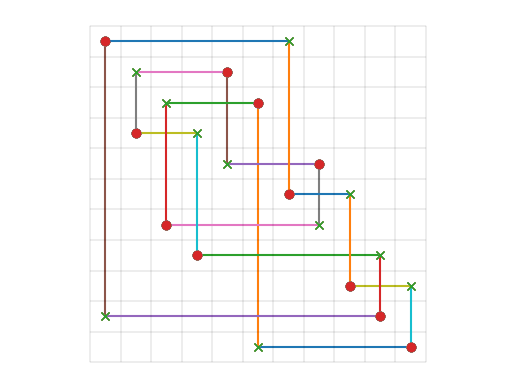

PD notation: [[4, 0, 5, 21], [0, 6, 1, 5], [7, 20, 8, 21], [6, 2, 7, 1], [15, 9, 16, 8], [14, 19, 15, 20], [2, 13, 3, 14], [11, 19, 12, 18], [12, 3, 13, 4], [9, 17, 10, 16], [17, 11, 18, 10]]

         Keys |                                                                                Values
-----------------------------------------------------------------------------------------------------
L_space_knot  | False                                                                                
epsilon       | 1                                                                                    
fibered       | True                                                                                 
modulus       | 2                                                                                    
nu            | 2                                                                                    
ranks         | {(-3, -5): 1, (-2, -4): 3, (-1, -3): 4, (0, -2): 5, (1, -1): 4, (2, 0): 3, (3

In [46]:
# @title Input Form & Calculator

# @markdown ## Grid の2つの置換 xlist, olist の入力
xlist = "5, 0, 10, 9, 7, 8, 4, 3, 2, 1, 6" # @param {type:"string"}
olist = "10, 9, 8, 3, 2, 6, 7, 1, 5, 4, 0" # @param {type:"string"}
# @markdown 入力したら、Control + Return を押してください。

G = [ast.literal_eval(f"[{v}]") for v in [xlist, olist]]
print(f"Grid: {G}")
try:
    mgc = Grid(*G)
    mgc.draw()
    PD = mgc.get_PD()
    print(f"PD notation: {PD}\n")
    hfk_dict = hfk.pd_to_hfk(PD)
    tabulate_dict(hfk_dict)
except Exception as e:
    print(f"Caution!!  --> {e}")

# Tabulate the result
def tabulate_dict(mydict):
    max_key_len = max(len(key) for key in mydict)
    max_value_len = max(len(str(val)) for val in mydict.values())
    print(f"{'Keys':>{max_key_len}} | {'Values':>{max_value_len}}")
    print('-' * (max_key_len + 3 + max_value_len))
    for key, value in mydict.items():
        print(f"{key:{max_key_len}} | {str(value):{max_value_len}}")

In [ ]:
load_knot('8_5')

[[5, 0, 10, 9, 7, 8, 4, 3, 2, 1, 6], [10, 9, 8, 3, 2, 6, 7, 1, 5, 4, 0]]